In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

curr_path = os.getcwd()
root_dir = Path(curr_path).absolute().parent
results_dir = Path.joinpath(root_dir, "results/fedavg/mnist/FedAvg-LR1e3-C10")
server = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[0]), index_col=False)
clients = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[1]), index_col=False)

C:\Users\au475271\AppData\Local\Temp\ipykernel_13052\492412453.py:11: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  clients = pd.read_csv(Path.joinpath(results_dir, os.listdir(results_dir)[1]), index_col=False)


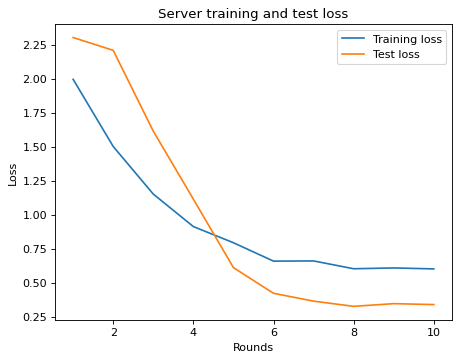

In [41]:
# Plot server loss
train_loss = server['train_loss']
test_loss = server['test_loss']
rounds = range(1, len(train_loss)+1)

plt.figure(dpi=80)
plt.plot(rounds, train_loss, label='Training loss')
plt.plot(rounds, test_loss, label='Test loss')
plt.title('Server training and test loss')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()

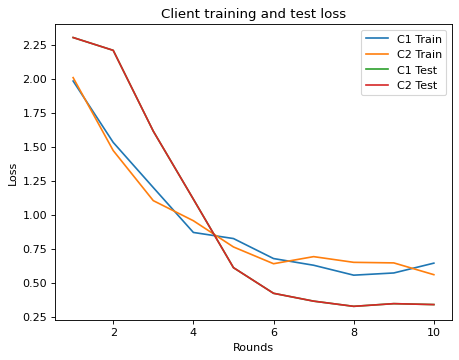

In [42]:
plt.figure(dpi=80)
for c_id in clients['client_id'].unique(): # Plot training loss
    client_res = clients.loc[clients['client_id'] == c_id]
    train_loss = client_res['train_loss']
    plt.plot(rounds, train_loss, label=f'C{c_id} Train')
for c_id in clients['client_id'].unique(): # Plot test loss
    client_res = clients.loc[clients['client_id'] == c_id]
    train_loss = client_res['test_loss']
    plt.plot(rounds, train_loss, label=f'C{c_id} Test')
plt.title('Client training and test loss')
plt.xlabel('Rounds')
plt.ylabel('Loss')
plt.legend()
plt.show()